# COGS 108 - Final Project: What should you focus on if you want to win at League of Legends

## Video

https://drive.google.com/drive/folders/1I8sYhBmfdTE05zHTg3qTSjgJ_FZ6Mw4O?usp=sharing

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Overview

*In this project we will be looking at the several factors in a league match and compare which factors stand out the most. Due to the complexity of the game and several factors being intertwined with one another, we will deduce which factor is most relevant when it comes to winning a game. Ultimately, through our research we found that the main factor to determining if a team will win or lose is the deaths within the 10 minutes of recorded data.*

# Names

- Justin Quong
- Jesse Sanchez Villegas
- Sergio Talavera
- Shane Valderrama
- Weiyu Hu

<a id='research_question'></a>
# Research Question

*How important are League of Legends factors such as gold, player kills, monster kills, structures destroyed, experience points, and player levels towards winning a game?*

<a id='background'></a>

## Background & Prior Work

*About the Game: League of Legends is a free multiplayer online battle arena game. This game has been successful and is extending its platform to even more games and even its own show. So what does a game consist of? A League of Legends match (abbreviated as LOL) consists of 2 teams of 5 people going against each other in a map that has three lanes and a jungle in between the lanes. There are multiple variables that can change in a game but first the constant features are creepers, monster bosses, monsters in the jungle, towers and the end goal destroying the enemy's Nexus (crystal). Creepers are little bots that fight in lanes and try to destroy the towers to ultimately get to the Nexus. Monsters are bots in the jungle that stay stationary unless provoked. The purpose of monsters and creepers are for the players to kill to gain experience points to level up and get gold to buy equipement in order to get their character stronger for the match. Bosses altough do give experience points, their main purpose is the give the team who lands the killing blow a massive character stat boost that could turn the tide of the match or even secure a win. Now the variables that can change are mostly player dependent, but before that dragons, which are one of the game's bosses, change in terms of stat enhancements applied to the team and can also alter the map. For player-dependent variables, since a game consists of 10 players, the game offers a roster of 100 characters that a player can choose from, each with their own unique abilities. Another thing that the player determines is what equipment to buy for their character.*

*Previous Work: Due to the game's complexity, it's a bit difficult to predict which team will win as several factors have to be considered. Using a previous work done by League Math we can see that teams that complete the first objective, whether it be defeating bosses, get kills, or destroy towers, have a higher chance at winning the game. This makes sense as this lead in gold and experience points can create momentum for a team to stay ahead and ultimately win. With that said, the more significant objectives that teams should emphasize are being the first to kill a dragon as the win chance increases up to 70.69%, and taking the first inhibitor which raises the win chance to 79.28%. So using this data from League Math we can see that when it comes to objectives the team that completes the first objectives in a game are more likely to win. However, there are still more factors we have not considered that could change the course of the match. The next source will be from an article written by MobaChampion.com, specifically Five Factors That You Should Know to Win League of Legends. In this, Byungho Haao Kim focused more on team dynamic and participation instead of objective, unlike our previous source. One factor they mention is that the higher the vision score a team has, the higher the win rate they have. To clarify, League of Legends has an item called a ward that can be placed on the map to give a team vision at placed location without having to be there themselves. This is important as it gives team the knowledge where enemy players are located and provides time to prepare to either engage or disengage the enemy. Along with this, these wards can be placed on the bosses so it alerts the team if the enemy is trying to sneak in a boss kill. Another factor Kim looked into was assist participation. Typically players want to get the kill on enemies to gain the gold and more experience points, but according the Kim's research, the team that have a better assist-to-death ratio (not kills) have a higher win rate. In other words, working more as a team instead of independently likely will improve your chances of winning.*

References (include links):
- 1) https://www.invenglobal.com/articles/8188/five-factors-that-you-should-know-to-win-league-of-legends
- 2) https://www.leaguemath.com/win-condition-analysis/

# Hypothesis


*We hypothesize the most important factors to winning a League of Legends game would have to be the amount of player kills you have and the higher level you are. These two factors typically coincide with more experienced players who take control of the playing field and are efficient at taking down the opposing team, thus having greater influence of the outcome of the game. Other game objectives, such as monster kills, structures destroyed, and experience gained could influence control over the playing field but we believe that these factors do not contribute as much towards winning a game.*

# Dataset(s)


- Dataset Name: "high_diamond_ranked_10min.csv" 
- Link to the dataset: https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min
- Number of observations: 9879 observations

Our dataset is a collection of game statistics taken exactly at the 10 minute mark in the game. It contains data for both the red team and the blue team. It has a wide variety of statistics from the number of kills to the number of objectives taken. We are looking to use these statistics taken from early in the game to determine the outcome of the game.

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import random

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support
import sklearn.svm as SVC
from sklearn.svm import SVC

# Data Cleaning

In [2]:
df = pd.read_csv("Data/high_diamond_ranked_10min.csv")
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


Our data here appears to be integers. We can check that with dtype. If they are all integers or floats, we do not need to convert any of our data from string to int/float.

In [3]:
df.dtypes

gameId                            int64
blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redFirstBlood                     int64
redKills                          int64


We can look at the column names to see if there are redundant or unneeded columns that we can remove.

In [4]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

The columns pertaining to PerMin can be looked at, because our dataset will always be at the 10 minute mark.

In [5]:
[x/10 for x in df["blueTotalGold"].tolist()]== df["blueGoldPerMin"].tolist()

True

In [6]:
[x/10 for x in df["redTotalGold"].tolist()]== df["redGoldPerMin"].tolist()

True

In [7]:
[x/10 for x in df["blueTotalMinionsKilled"].tolist()]== df["blueCSPerMin"].tolist()

True

In [8]:
[x/10 for x in df["redTotalMinionsKilled"].tolist()]== df["redCSPerMin"].tolist()

True

We can look at the GoldDiff column to see if it is just a difference between the total golds.

In [9]:
# If value comes out as 1, all values are True.
np.mean(df["blueTotalGold"] - df["redTotalGold"] == df["blueGoldDiff"])

1.0

In [10]:
# If value comes out as 1, all values are True.
np.mean(df["redTotalGold"] - df["blueTotalGold"] == df["redGoldDiff"])

1.0

We were curious to see if EliteMonsters were just a sum of dragons and heralds. There is another elite monster but it is not available to kill until after 20 minutes which is not in the timeframe of our data.

In [11]:
# If value comes out as 1, all values are True.
np.mean(df["blueDragons"] + df["blueHeralds"] == df["blueEliteMonsters"])

1.0

In [12]:
# If value comes out as 1, all values are True.
np.mean(df["redDragons"] + df["redHeralds"] == df["redEliteMonsters"])

1.0

We can see that we have redudant information in these columns. The redudant columns are ['blueEliteMonsters', 'redEliteMonsters', 'blueGoldPerMin', 'redGoldPerMin','blueExperienceDiff', 'redExperienceDiff', 'blueGoldDiff', 'redGoldDiff', 'blueCSPerMin', 'redCSPerMin']

In [13]:
df_cleaned = df.drop(['blueEliteMonsters', 'redEliteMonsters', 'blueGoldPerMin', 'redGoldPerMin','blueExperienceDiff', 'redExperienceDiff', 'blueGoldDiff', 'redGoldDiff', 'blueCSPerMin', 'redCSPerMin'],1)

In [14]:
df_cleaned

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,...,redDeaths,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,4519157822,0,28,2,1,9,6,11,0,0,...,9,8,0,0,0,16567,6.8,17047,197,55
1,4523371949,0,12,1,0,5,5,5,0,0,...,5,2,1,1,1,17620,6.8,17438,240,52
2,4521474530,0,15,0,0,7,11,4,1,0,...,7,14,0,0,0,17285,6.8,17254,203,28
3,4524384067,0,43,1,0,4,5,5,0,1,...,4,10,0,0,0,16478,7.0,17961,235,47
4,4436033771,0,75,4,0,6,6,6,0,0,...,6,7,1,0,0,17404,7.0,18313,225,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,0,...,7,7,0,0,0,15246,6.8,16498,229,34
9875,4527797466,1,54,0,0,6,4,8,1,0,...,6,3,0,0,0,15456,7.0,18367,206,56
9876,4527713716,0,23,1,0,6,7,5,0,0,...,6,11,1,0,0,18319,7.4,19909,261,60
9877,4527628313,0,14,4,1,2,3,3,1,0,...,2,1,0,0,0,15298,7.2,18314,247,40


In [15]:
df_cleaned.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 'redDragons',
       'redHeralds', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel',
       'redTotalExperience', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled'],
      dtype='object')

In [16]:
df_cleaned.shape

(9879, 30)

In [17]:
df.shape

(9879, 40)

In [18]:
df_cleaned

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,...,redDeaths,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,4519157822,0,28,2,1,9,6,11,0,0,...,9,8,0,0,0,16567,6.8,17047,197,55
1,4523371949,0,12,1,0,5,5,5,0,0,...,5,2,1,1,1,17620,6.8,17438,240,52
2,4521474530,0,15,0,0,7,11,4,1,0,...,7,14,0,0,0,17285,6.8,17254,203,28
3,4524384067,0,43,1,0,4,5,5,0,1,...,4,10,0,0,0,16478,7.0,17961,235,47
4,4436033771,0,75,4,0,6,6,6,0,0,...,6,7,1,0,0,17404,7.0,18313,225,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,0,...,7,7,0,0,0,15246,6.8,16498,229,34
9875,4527797466,1,54,0,0,6,4,8,1,0,...,6,3,0,0,0,15456,7.0,18367,206,56
9876,4527713716,0,23,1,0,6,7,5,0,0,...,6,11,1,0,0,18319,7.4,19909,261,60
9877,4527628313,0,14,4,1,2,3,3,1,0,...,2,1,0,0,0,15298,7.2,18314,247,40


We have removed 10 columns of redundant information.

Looking at the remaining columns, it appears we do not have any other redundant information. One thing to notice is that there is a distinction between red side and blue side. I do not think separating them would be beneficial to us other than if we separate them for our data visualization purposes. I will separate them into two datasets for us to graph easier. However, I will leave it in one dataset for when we need to shuffle our data for our linear regression model.

In [19]:
red = df_cleaned.filter(regex="red")
red.insert(0, "gameId", df_cleaned['gameId'])
red.insert(1,"Wins", df_cleaned['blueWins'].replace({0:1, 1:0}))
red.columns = red.columns.str.lstrip("red")
red.head()

,gameId,Wins,WardsPlaced,WardsDestroyed,FirstBlood,Kills,Deaths,Assists,Dragons,Heralds,TowersDestroyed,TotalGold,AvgLevel,TotalExperience,TotalMinionsKilled,TotalJungleMinionsKilled
0,4519157822,1,15,6,0,6,9,8,0,0,0,16567,6.8,17047,197,55
1,4523371949,1,12,1,1,5,5,2,1,1,1,17620,6.8,17438,240,52
2,4521474530,1,15,3,1,11,7,14,0,0,0,17285,6.8,17254,203,28
3,4524384067,1,15,2,1,5,4,10,0,0,0,16478,7.0,17961,235,47
4,4436033771,1,17,2,1,6,6,7,1,0,0,17404,7.0,18313,225,67


In [20]:
blue = df_cleaned.filter(regex="blue")
blue.insert(0,"gameId", df_cleaned['gameId'])
blue.columns = blue.columns.str.lstrip("blue")
blue.head()

,gameId,Wins,WardsPlaced,WardsDestroyed,FirstBlood,Kills,Deaths,Assists,Dragons,Heralds,TowersDestroyed,TotalGold,AvgLevel,TotalExperience,TotalMinionsKilled,TotalJungleMinionsKilled
0,4519157822,0,28,2,1,9,6,11,0,0,0,17210,6.6,17039,195,36
1,4523371949,0,12,1,0,5,5,5,0,0,0,14712,6.6,16265,174,43
2,4521474530,0,15,0,0,7,11,4,1,0,0,16113,6.4,16221,186,46
3,4524384067,0,43,1,0,4,5,5,0,1,0,15157,7.0,17954,201,55
4,4436033771,0,75,4,0,6,6,6,0,0,0,16400,7.0,18543,210,57


In [21]:
df_teams = red.append(blue, ignore_index = True)

In [22]:
df_teams

,gameId,Wins,WardsPlaced,WardsDestroyed,FirstBlood,Kills,Deaths,Assists,Dragons,Heralds,TowersDestroyed,TotalGold,AvgLevel,TotalExperience,TotalMinionsKilled,TotalJungleMinionsKilled
0,4519157822,1,15,6,0,6,9,8,0,0,0,16567,6.8,17047,197,55
1,4523371949,1,12,1,1,5,5,2,1,1,1,17620,6.8,17438,240,52
2,4521474530,1,15,3,1,11,7,14,0,0,0,17285,6.8,17254,203,28
3,4524384067,1,15,2,1,5,4,10,0,0,0,16478,7.0,17961,235,47
4,4436033771,1,17,2,1,6,6,7,1,0,0,17404,7.0,18313,225,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19753,4527873286,1,17,2,1,7,4,5,1,0,0,17765,7.2,18967,211,69
19754,4527797466,1,54,0,0,6,4,8,1,0,0,16238,7.2,19255,233,48
19755,4527713716,0,23,1,0,6,7,5,0,0,0,15903,7.0,18032,210,45
19756,4527628313,0,14,4,1,2,3,3,1,0,0,14459,6.6,17229,224,48


In [23]:
dfbw=df_cleaned[df_cleaned['blueWins'] == 1]
dfbl= df_cleaned[df_cleaned['blueWins'] == 0]

# Data Analysis & Results

### Graph 1: Red versus Blue
We will now graph and compare the factors between the red and blue team. For this we set the blue team win == 0 to indicate that we are looking at the games where the blue team lost and the red team won.

<AxesSubplot:title={'center':'Stats for red team'}, ylabel='Count'>

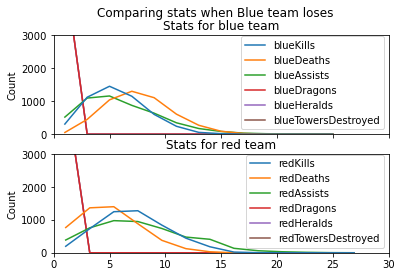

In [24]:
fig, (ax1,ax2) = plt.subplots(nrows=2,sharex=True, sharey=True)
fig.suptitle('Comparing stats when Blue team loses')
ax1.set_title('Stats for blue team')
ax2.set_title('Stats for red team')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax1.set_xlim(0,30)
ax2.set_xlim(0,30)
ax1.set_ylim(0,3000)
ax2.set_ylim(0,3000)
sns.histplot([dfbl['blueKills'], dfbl['blueDeaths'], dfbl['blueAssists'],dfbl['blueDragons'], dfbl['blueHeralds'], dfbl['blueTowersDestroyed']],bins=13,element='poly', fill = False,ax=ax1)
sns.histplot([dfbl['redKills'], dfbl['redDeaths'], dfbl['redAssists'],dfbl['redDragons'], dfbl['redHeralds'], dfbl['redTowersDestroyed']],bins=13,element='poly', fill = False,ax=ax2)

### Results 1: Comparing Team Stats
In this set of graphs we can see that the red team (team that won) has more kills, assists, and less deaths than that of the blue team. This can be some of the factors as to what lead the red team to win.

### Graph 2: Isolating Experience and Gold
Due to the Experience and Gold being a signicantly larger number than the other factors we seperated them to be able to visualize them better.

Text(0.5, 1.0, 'Stats for Red team')

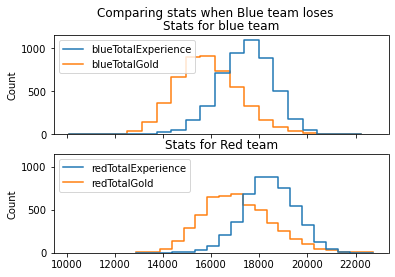

In [25]:
fig, (ax1,ax2) = plt.subplots(nrows=2,sharex=True, sharey=True)
fig.suptitle('Comparing stats when Blue team loses')
sns.histplot([dfbl['blueTotalExperience'], dfbl['blueTotalGold']],bins=20,element='step', fill = False,ax=ax1)
ax1.set_title('Stats for blue team')
sns.histplot([dfbl['redTotalExperience'], dfbl['redTotalGold']],bins=20,element='step', fill = False,ax=ax2)
ax2.set_title('Stats for Red team')

### Results 2: Comparing Experience with Gold
From these graphs we see that the red team(team that won) has on average more gold and total experience than that of the blue team. You can see this by looking at the x-axis of the graph. This can be a possible factor as to why the red team won.

### Graph 3: Analyzing Wards
The wards destroyed and placed were seperated as they did not fit the graph 1 in order to be able to view them better.

<AxesSubplot:title={'center':'Stats for red team'}, ylabel='Count'>

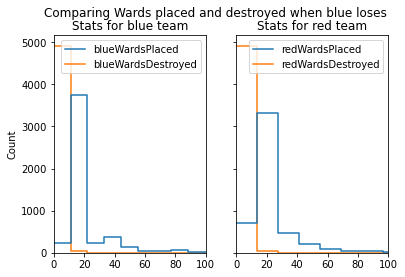

In [26]:
fig, (ax1,ax2) = plt.subplots(ncols=2,sharex=True, sharey=True)
fig.suptitle('Comparing Wards placed and destroyed when blue loses')
ax1.set_xlim(0,100)
ax2.set_xlim(0,100)
ax1.set_title('Stats for blue team')
ax2.set_title('Stats for red team')
ax1.set_xlabel('')
ax2.set_xlabel('')
sns.histplot([dfbl['blueWardsPlaced'],dfbl['blueWardsDestroyed']],bins=20,element='step', fill = False,ax=ax1)
sns.histplot([dfbl['redWardsPlaced'],dfbl['redWardsDestroyed']],bins=20,element='step', fill = False,ax=ax2)

### Results 3: Ward Placement Works
What we get from these set of graphs is that for the red team (team that won) the amount of wards placed is more skewed to the right meaning the red team placed more wins which could be an indicator of why they won.

### Graph 4: Levels
The next graph analyzes the average level between losing (Blue) team and winning team (Red).

<AxesSubplot:ylabel='Count'>

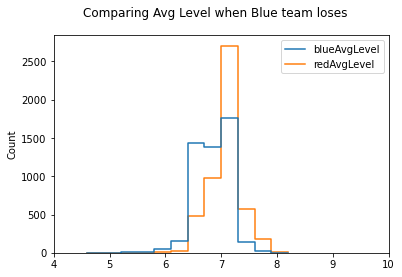

In [27]:
fig, (ax1) = plt.subplots(nrows=1,sharex=True, sharey=True)
fig.suptitle('Comparing Avg Level when Blue team loses')
ax1.set_xlabel('')
ax1.set_xlim(4,10)
sns.histplot([dfbl['blueAvgLevel'],dfbl['redAvgLevel']],bins=12,element='step', fill = False,ax=ax1)

### Results 4: Higher Levels Tend to Win More
We see on average that the winning team (Red) is skewed to the right meaning on average they had a higher level than that of the losing team (Blue).

### Graph 5: Dragons, Heralds, and Towers
The next graph will analyze how effective dragon kills, herald kills, and destroyed towers were in giving the team a win.

Text(0.5, 1.0, 'Wins vs Towers Destroyed')

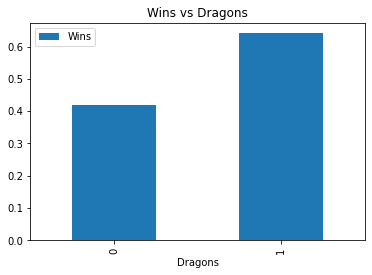

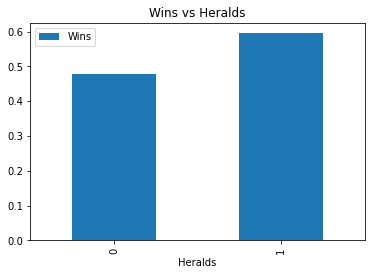

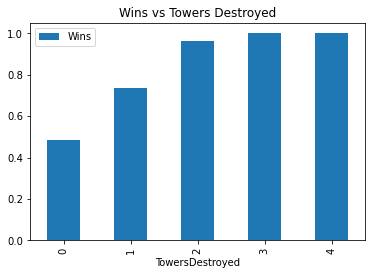

In [28]:
blue_dht = blue[['gameId', 'Wins', 'Dragons', 'Heralds', 'TowersDestroyed']]
bd = pd.pivot_table(blue_dht, values='Wins', index=['Dragons'])
bd.plot.bar(y='Wins')
plt.title('Wins vs Dragons')
diff_with_dragons = bd['Wins'].loc[1] - bd['Wins'].loc[0]

bh = pd.pivot_table(blue_dht, values='Wins', index=['Heralds'])
bh.plot.bar(y='Wins')
plt.title('Wins vs Heralds')
diff_with_heralds = bh['Wins'].loc[1] - bh['Wins'].loc[0]

bt = pd.pivot_table(blue_dht, values='Wins', index=['TowersDestroyed'])
bt.plot.bar(y='Wins')
plt.title('Wins vs Towers Destroyed') 

### Results 5: Analyzing Dragon, Herald, and Tower's Influence
As shown above, of those who killed a dragon, they about 22% more likely to win the game comparing to those who has not killed a dragon in the first ten minutes. Similarly, of those who killed a herald, they about 11.8% more likely to win the game comparing to those who has not killed a herald in the first ten minutes. Lastly, from the bar plot which has x-axis as "TowersDestroyed", we can see a trend: the more towers blue team has destroyed in the first ten minutes, they are more likely to win. Surprisingly, among those who destroyed 3 or more towers, they all win their games. The winning rate for them is 100%.

# Binary Classifier

We want to look at all the variables and determine which are impactful on who will win the game. We will try to find features that we may remove from our final classifier.

In [29]:
df_teams

,gameId,Wins,WardsPlaced,WardsDestroyed,FirstBlood,Kills,Deaths,Assists,Dragons,Heralds,TowersDestroyed,TotalGold,AvgLevel,TotalExperience,TotalMinionsKilled,TotalJungleMinionsKilled
0,4519157822,1,15,6,0,6,9,8,0,0,0,16567,6.8,17047,197,55
1,4523371949,1,12,1,1,5,5,2,1,1,1,17620,6.8,17438,240,52
2,4521474530,1,15,3,1,11,7,14,0,0,0,17285,6.8,17254,203,28
3,4524384067,1,15,2,1,5,4,10,0,0,0,16478,7.0,17961,235,47
4,4436033771,1,17,2,1,6,6,7,1,0,0,17404,7.0,18313,225,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19753,4527873286,1,17,2,1,7,4,5,1,0,0,17765,7.2,18967,211,69
19754,4527797466,1,54,0,0,6,4,8,1,0,0,16238,7.2,19255,233,48
19755,4527713716,0,23,1,0,6,7,5,0,0,0,15903,7.0,18032,210,45
19756,4527628313,0,14,4,1,2,3,3,1,0,0,14459,6.6,17229,224,48


In [30]:
X = df_teams.iloc[:,2:]
Y = df_teams.iloc[:,1].to_frame()
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,test_size = .25, random_state = 100)

In [31]:
def train_SVM(X, y, kernel='linear'):
    clf = SVC(kernel=kernel)
    clf.fit(X, y)
    
    return clf

First, we can try to train and predict across all variables available. Later on, I will look at feature selection to determine variables we might not need.

In [32]:
lol_clf = train_SVM(train_X,train_Y)
predicted_test_Y = lol_clf.predict(test_X)
print(classification_report(test_Y, predicted_test_Y))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71      2519
           1       0.70      0.74      0.72      2421

    accuracy                           0.71      4940
   macro avg       0.71      0.71      0.71      4940
weighted avg       0.72      0.71      0.71      4940



In [33]:
# Train across all exclusively.
for i in range(len(df_teams.columns)-2):
    variable_train = train_X.iloc[:,i].to_frame()
    variable_test = test_X.iloc[:,i].to_frame()
    stat_clf = train_SVM(variable_train,train_Y)
    predicted_train_Y = stat_clf.predict(variable_train) #testing on train
    #predicted_test_Y = stat_clf.predict(variable_test) #testing on test
    print("Classification Report: " + train_X.columns[i])
    #print(classification_report(test_Y, predicted_test_Y))
    print(classification_report(train_Y, predicted_train_Y))

Classification Report: WardsPlaced
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7360
           1       0.50      1.00      0.67      7458

    accuracy                           0.50     14818
   macro avg       0.25      0.50      0.33     14818
weighted avg       0.25      0.50      0.34     14818

Classification Report: WardsDestroyed
              precision    recall  f1-score   support

           0       0.51      0.74      0.61      7360
           1       0.55      0.31      0.39      7458

    accuracy                           0.52     14818
   macro avg       0.53      0.52      0.50     14818
weighted avg       0.53      0.52      0.50     14818

Classification Report: FirstBlood
              precision    recall  f1-score   support

           0       0.60      0.60      0.60      7360
           1       0.61      0.60      0.60      7458

    accuracy                           0.60     14818
   macro avg       0.

Above, we ran a single feature binary classifier on each variable to see if we could predict if a team could win with the given single variable.

Some key findings here are that WardsPlaced is definitely not a good key indicator to whether a team can win. Although it is not a key feature, it could be a feature that makes our classifier more accurate.

We do not want to overfit and will only use the features that individually got more than a 0.60 precision accuracy.
These include: FirstBlood, Kills, Deaths, Assists, Dragons, TowersDestroyed.
Limiting to these features will help us further determine which is the most important factor.

In [33]:
important_feats_train_X = train_X[['FirstBlood', 'Kills', 'Deaths', 'Assists', 'Dragons', 'TowersDestroyed']]
important_feats_test_X = test_X[['FirstBlood', 'Kills', 'Deaths', 'Assists', 'Dragons', 'TowersDestroyed']]

In [ ]:
# Train across all important features excluding one at a time.
for i in range(len(important_feats_train_X.columns)-2):
    excluded_variable_train = important_feats_train_X.drop(important_feats_train_X.columns[i],axis=1)
    excluded_variable_test = important_feats_test_X.drop(important_feats_test_X.columns[i],axis=1)
    stat_clf = train_SVM(excluded_variable_train,train_Y)
    predicted_train_Y = stat_clf.predict(excluded_variable_train) #testing on train or train
    #predicted_test_Y = stat_clf.predict(excluded_variable_test) #testing on train or test

    print("Classification Report: Excluding " + important_feats_train_X.columns[i])
    print(classification_report(train_Y, predicted_train_Y))
    #print(classification_report(test_Y, predicted_test_Y))

Classification Report: Excluding FirstBlood
              precision    recall  f1-score   support

           0       0.73      0.69      0.71      7360
           1       0.71      0.75      0.73      7458

    accuracy                           0.72     14818
   macro avg       0.72      0.72      0.72     14818
weighted avg       0.72      0.72      0.72     14818

Classification Report: Excluding Kills
              precision    recall  f1-score   support

           0       0.73      0.68      0.71      7360
           1       0.71      0.76      0.73      7458

    accuracy                           0.72     14818
   macro avg       0.72      0.72      0.72     14818
weighted avg       0.72      0.72      0.72     14818

Classification Report: Excluding Deaths
              precision    recall  f1-score   support

           0       0.71      0.67      0.69      7360
           1       0.69      0.73      0.71      7458

    accuracy                           0.70     14818
   ma

It appears that Deaths are an important aspect in determining the winner of a League of Legends tournament at 10 minutes. Deaths are an important statistic, because kills and deaths are not one-to-one. You can still die without providing a kill to the enemy team, but when they enemy team kills you, you will always die. This aspect is important in determining the winner of the game, because of the ramifications deaths have. If you die, you are also losing, gold income, experience, and possible damage done to towers. These are important to winning a game and when you die, it is detrimental to your and your team's success.

An interesting note is that our classifier is more accurate at predicting losses than it is predicting wins.

# Ethics & Privacy

*The main concern our data poses is that some of the players may be unaware their matches are being recorded and used as data. Fortunately for us, the League of Legends client has already gotten permission from people who play the game to record the game data therefore the people we are gathering data from have consented. A possible concern that some may have is the privacy of the players. In response to this we made sure to base our stats not on the individual players, but stats of the game all together. We also made sure to only use the game ID as a classifier and not individual players. With this said, another concern would be that people could still use the game ID to search the match and figure out the players usernames. However the League Web Match History is said to have been taken down on September 7, 2021 so that concern is no longer viable. Another concern would be the in game recorded chat logs as it can be used to discriminate or trace to players. Therefore, we did not record nor include any chat logs within our data to respect the privacy of the players in our data set and maintain their hidden identity. Possible bias that could arise from our data gathering is that people who are aware they are being recorded may either intentionally lose the game or conversely play more seriously than usual. Therefore, we used data collected from the first 10 minutes of a game in diamond ranking. Diamond ranking is the competitive skill rank players have in which only the top 12.6% of league of legends players are in diamond. This would then concentrate the skill level to be more equal between the red and blue teams as well as using a pool of players that have a good understanding of the game. The purpose of the time limit is because League of Legend matches can last from 15 minutes to more than an hour, so to prevent our data from getting burnt out players we collected within the first 10 minutes. Finally, as we are not affiliated to any of the matches nor players within the matches bias among the research team is minimal as we only differentiate via the team color they are playing for and if they won or lost.*

# Conclusion & Discussion

Our Hypothesis was incorrect in that kills and player level are not the main factor when it comes to winning a League of Legends game. Instead, we found out the teams with the least deaths are more likely to win. The reasoning why it is not player kills is because players can die through other causes like monster bosses or minions. Therefore, deaths show a more accurate relationship between teams that win or lose. To go more into detail why deaths are more important is because in the game if a player dies, they must wait a timeout period before they respawn and return to the fight, this time loss means the player is behind not only in gold but in experience points. In addition to this, the enemy team can take advantage of this timeout period and get ahead. As a result, the team with more deaths are weaker than the enemy team and more prone to lose the game. We would like to point out limitations to our analysis. The first being it is recording the first 10 minutes of a game which can be a small portion with respect to a complete match time length. This may be concerning because we might lose some important data. Another limit in our analysis is that we did not investigate the factor of player’s champion selection as there are more than 120 champions players can choose. We bring this up to mention this is most likely another factor that can influence a team’s change of winning or losing.

# Team Contributions

- Justin Quong: Cleaned the dataset, worked on the binary classifier
- Jesse Sanchez Villegas: Simplified EDA graphs, work on data annotation and cleaned up final project.
- Sergio Talavera: Contributed to EDA graphs, ethics/privacy section, and worked on organizing and cleaning the final project.
- Shane Valderrama: Edited video and updated EDA for certain factors
- Weiyu Hu: Found references, EDA analysis and graphs, organized anlysis for EDA checkpoint.